# CHROMA-BASED SUPERVISED MODE RECOGNITION IN THE MULTI-CULTURAL CONTEXT


There are 3 main steps in the workflow of this notebook: Feature Extraction, Data Formatting and Classification. 
---

IMPORTANT : All the audio files should be located in the directory specifically according to their modality type.



## STEP 1 : GATHERING DATA / DOWNLOADING THE AUDIO FILES

### Input : 
#### JSON file :
which contains the mbids of audio files, the tonic information, the modality category (e.g. makam, mode, rag, tab, etc. ) In the case of multiple modalities within one song, the start and end times of different sections needs to be specified.

#### Directory :
Output directory for the dataset to be downloaded


In [1]:
from compmusic import dunya
from modeUtils.utilities import downloadDataset
import matplotlib.pyplot as plt
%matplotlib inline  
#token will be shared upon request
dunya.set_token('__EnterYourTokenHere__') 

### Please set the directory for the dataset to be downloaded and the name of the annotations file (JSON).
dataDir = 'data/Turkish/'
annotationsFile = 'annotations.json'

#dataDir = 'data/Hindustani/'
#annotationsFile = 'annotations_hindustani.json'

#dataDir = 'data/Carnatic/'
#annotationsFile = 'annotations_carnatic.json'

In [2]:
downloadDataset(annotationsFile,dataDir)

{'Hicazkar', 'Ussak', 'Saba', 'Suzinak', 'Neva', 'Acemasiran', 'Kurdilihicazkar', 'Bestenigar', 'Huseyni', 'Karcigar', 'Beyati', 'Muhayyer', 'Segah', 'Hicaz', 'Huzzam', 'Sultaniyegah', 'Mahur', 'Rast', 'Nihavent', 'Acemkurdi'}
Dataset downloaded and created in data/Turkish/ folder


## STEP 2 : FEATURE EXTRACTION

### Input : 
 - JSON file :
    which contains the mbids of audio files, the tonic information, the modality category (e.g. makam, mode, rag, tab, etc. ) In the case of multiple modalities within one song, the start and end times of different sections needs to be specified.

 - numBins(int) : Number of bins in the Chroma Vectors. This is parametrized in consideration of possible microtonalities existing in non-Western music traditions (12,24,36,48, ...)
 - musicTradition (str) : Name of the modality type specific for the music tradition.
 
 
         Jazz : Chord-scale
 
         Turkish Classical Music : Makam
 
         Hindustani Classical Music : Rag
 
         Carnatic Classical Music : Raaga
 
         

### Output : 
#### PICKLE file :
which has a list of dictionaries where each dictionary contains the Frame-based features, the global statistical features and the ground truth information (tonic, mode type) of each of the audio files.

##### IMPORTANT : All the audio files should be located in the directory specifically according to their harmonic mode type.


Note that the functions that are used in this tutorial can be found in modeUtils/utilities.py, which is provided in the repository.

In [6]:
!python3 ChromaFeatureExtraction.py -h

usage: ChromaFeatureExtraction.py [-h] -t TRADITION -n NUMBEROFBINS -o
                                  OUTPUT_DIRECTORY

A tool for Chroma (HPCP) Feature Extraction using Essentia library. (FEATURE
EXTRACTION)

optional arguments:
  -h, --help            show this help message and exit
  -t TRADITION, --tradition TRADITION
                        Input music tradition to perform the mode
                        classification task
  -n NUMBEROFBINS, --numberofBins NUMBEROFBINS
                        Input number of bins per octave in chroma vectors
  -o OUTPUT_DIRECTORY, --output_directory OUTPUT_DIRECTORY
                        Output directory for the pickle file that contains the
                        dataset with the extracted features


In [2]:
!python3 ChromaFeatureExtraction.py -t TurkishClassicalMusic -n 48 -o 'data/Turkish/'

Analysis on TurkishClassicalMusic Tradition.

Number of bins per octave in the Chroma Vectors : 48
mode categories in the dataset : 

{'Ussak', 'Nihavent', 'Hicaz', 'Muhayyer', 'Rast', 'Acemkurdi', 'Beyati', 'Mahur', 'Neva', 'Sultaniyegah', 'Segah', 'Suzinak', 'Huseyni', 'Huzzam', 'Kurdilihicazkar', 'Bestenigar', 'Acemasiran', 'Karcigar', 'Saba', 'Hicazkar'} 

Number of Categories in the dataset
20
Feature Extraction in Process. This might take a while...
extracting Features for Makam :  Acemasiran
extracting Features for Makam :  Acemkurdi
extracting Features for Makam :  Bestenigar
extracting Features for Makam :  Beyati
extracting Features for Makam :  Hicaz
extracting Features for Makam :  Rast
extracting Features for Makam :  Hicaz
extracting Features for Makam :  Hicazkar
extracting Features for Makam :  Huseyni
extracting Features for Makam :  Huzzam
extracting Features for Makam :  Karcigar
extracting Features for Makam :  Kurdilihicazkar
extracting Features for Makam :  Mahur


## STEP 3 :  MACHINE LEARNING & AUTOMATIC AUDIO CLASSIFICATION

### Input : 
#### PICKLE file : 
which is the output of the first notebook in the series (Feature Extraction).


### Output :
#### CSV file : 
The output CSV file that contains the FeatureData (X) and the class labels (Y), in appropriate format for the Machine Learning Pipeline.

#### Parameters:


 - numBins(int) : number of bins in the HPCPvectors ([12,24,36,48])
 
 
 - region(float) : select the first 'x*100'% of the audio files for analysis. The classification is performed using the features that are extracted locally only from specified region of the songs.
 

 - combined (boolean) : if combined = 1, classification is performed using the combination of features that are extracted both locally and globally. if combined = 0, only locally obtained features are used for classification. The local region is specified by partSong. Default = True.
 

In [43]:
!python3 DataFormatting.py -h

usage: DataFormatting.py [-h] -i INPUT_FILENAME -f FEATURES_SET -r REGION -c
                         COMBINED

A tool for converting the feature data into proper format for the machine
learning pipeline

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT_FILENAME, --input_filename INPUT_FILENAME
                        Name of the input pickle file which is the output file
                        of ChromaFeatureExtraction.py
  -f FEATURES_SET, --features_set FEATURES_SET
                        Set of features to include in the Feature Data.
                        options = {"mean","std","all"}
  -r REGION, --region REGION
                        Input region of audios (from the beginning) for
                        extracting local features. values = [0,1] (region = 1
                        is equivalent of using the Global Features)
  -c COMBINED, --combined COMBINED
                        Input number of bins per octave in chroma vectors SET

In [3]:
!python3 DataFormatting.py -i 'extractedFeatures_forMakamtradition(48bins).pkl' -r 0.3 -c True

Makam
computing Local Features for the first0.3region of the audio files is COMPLETE 

Mode types in this dataset:  

{'Saba', 'Suzinak', 'Ussak', 'Acemkurdi', 'Neva', 'Segah', 'Sultaniyegah', 'Rast', 'Hicaz', 'Hicazkar', 'Huseyni', 'Huzzam', 'Acemasiran', 'Beyati', 'Kurdilihicazkar', 'Muhayyer', 'Mahur', 'Bestenigar', 'Nihavent', 'Karcigar'}
Generating CSV file for the features meanLocal+stdGlobal is COMPLETE
Generating CSV file for the features stdLocal+meanGlobal is COMPLETE
Generating CSV file for the features meanLocal+meanGlobal is COMPLETE
Generating CSV file for the features stdLocal+stdGlobal is COMPLETE


In [17]:
!python3  Classification.py -h

usage: Classification.py [-h] -i INPUT_FILENAME -c COMBINED -r REGION

A tool for Chroma (HPCP) Feature Extraction using Essentia
library.(CLASSIFICATION)

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT_FILENAME, --input_filename INPUT_FILENAME
                        Name of the input pickle file which is the output file
                        of ChromaFeatureExtraction.py
  -c COMBINED, --combined COMBINED
                        Input number of bins per octave in chroma vectors SET
                        combined = 1 FOR PERFORMING CLASSIFICATION USING THE
                        COMBINATION OF LOCAL AND GLOBAL FEATURES; combined = 0
                        FOR USING ONLY THE LOCAL FEATURES (except the case
                        region = 1, which ALREADY corresponds to global
                        features)
  -r REGION, --region REGION
                        Input region of audios (from the beginning) for
                        extract

In [3]:
###CHOOSE THE CSV FILE WITH DESIRED FEATURE SET, TO INPUT FOR THE MACHINE LEARNING PIPELINE
import os
for file in os.listdir(dataDir):
    if file.endswith('.csv'):
        print(file)

DataCSVforstage_48bins_meanLocal+stdGlobal.csv
DataCSVforstage_48bins_meanLocal+meanGlobal.csv
DataCSVforstage_48bins_stdLocal+meanGlobal.csv
DataCSVforstage_48bins_stdLocal+stdGlobal.csv


In [7]:
!python3 Classification.py -i 'DataCSVforstage_48bins_stdLocal+stdGlobal.csv' -m Makam -r 0.3

This process might take a while (5-10 min) 
 CROSS-VALIDATION & TRAINING 
Accuracy score for the Feature Set stdLocal+stdGlobal : 
F-measure (mean,std) --- FINAL
0.76 0.0381356999378
Accuracy (mean,std) FINAL
0.77 0.038
['Acemasiran', 'Acemkurdi', 'Bestenigar', 'Beyati', 'Hicaz', 'Hicazkar', 'Huseyni', 'Huzzam', 'Karcigar', 'Kurdilihicazkar', 'Mahur', 'Muhayyer', 'Neva', 'Nihavent', 'Rast', 'Saba', 'Segah', 'Sultaniyegah', 'Suzinak', 'Ussak']
Confusion matrix, without normalization


Populating the interactive namespace from numpy and matplotlib


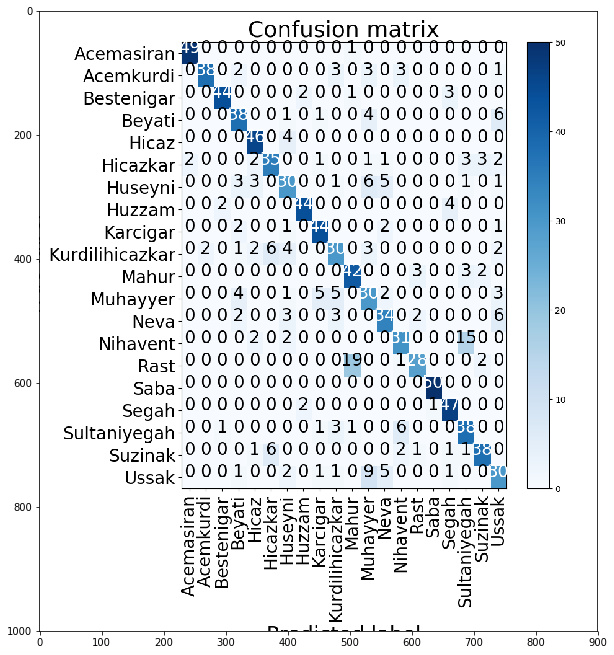

In [18]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(os.path.join(dataDir,'confusionMatrix.png'))
figure(figsize = (10,15));imgplot = plt.imshow(img)
plt.show()